In [5]:
import numpy as np
import glob
import pathlib
import PIL
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
train_path=pathlib.Path("/home/tower/Github/Dataset/Fruit-classification/archive/fruits-360_dataset/fruits-360/Training")
test_path=pathlib.Path("/home/tower/Github/Dataset/Fruit-classification/archive/fruits-360_dataset/fruits-360/Test")

In [8]:
image_count=len(list(train_path.glob("*/*.jpg")))
print(image_count)

67692


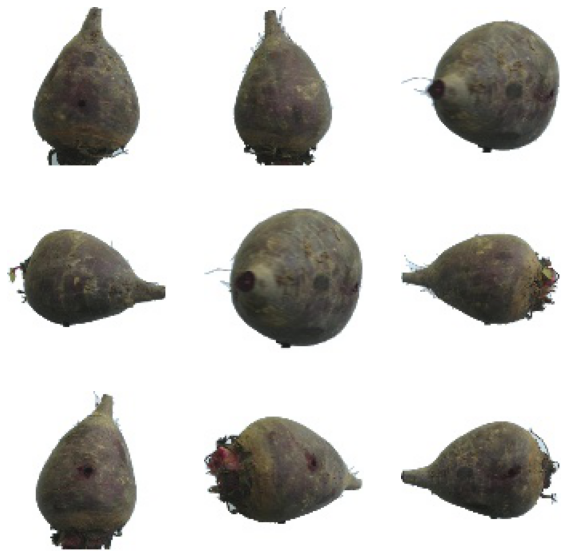

In [9]:
fruits=list(train_path.glob("Beetroot/*.jpg"))
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img=PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

In [11]:
batch_size=32
img_size=(100,100)

In [14]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(

train_path,
validation_split=0.2,
subset="training",
seed=42,
image_size=(100,100),
batch_size=32)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [15]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(

train_path,
validation_split=0.2,
subset="validation",
seed=42,
image_size=(100,100),
batch_size=32)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


In [16]:
class_names=train_ds.class_names
num_class=len(class_names)

2021-10-07 23:50:55.427945: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


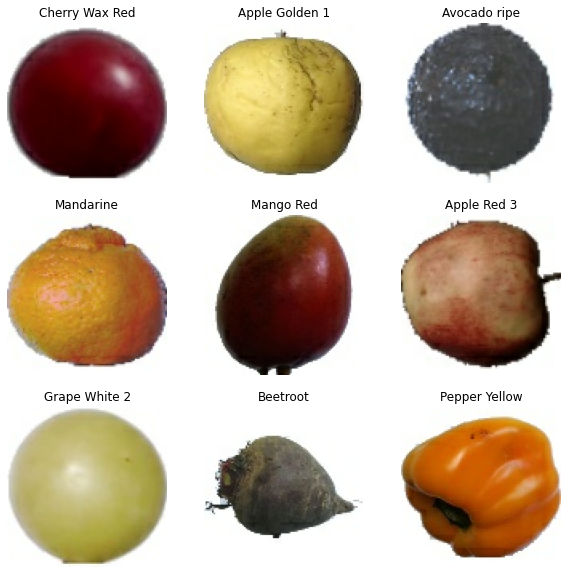

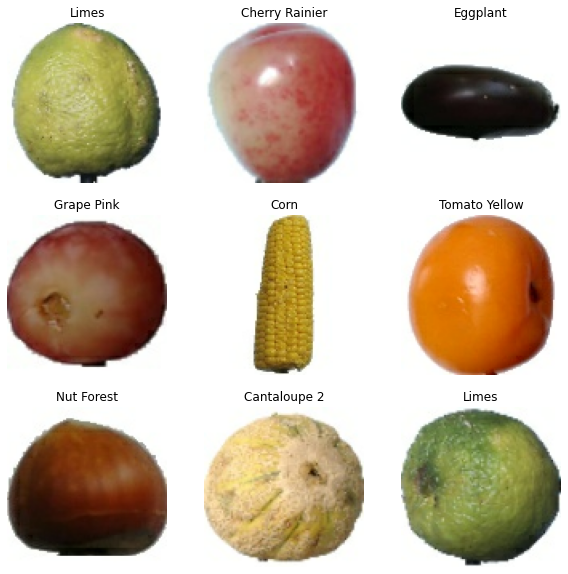

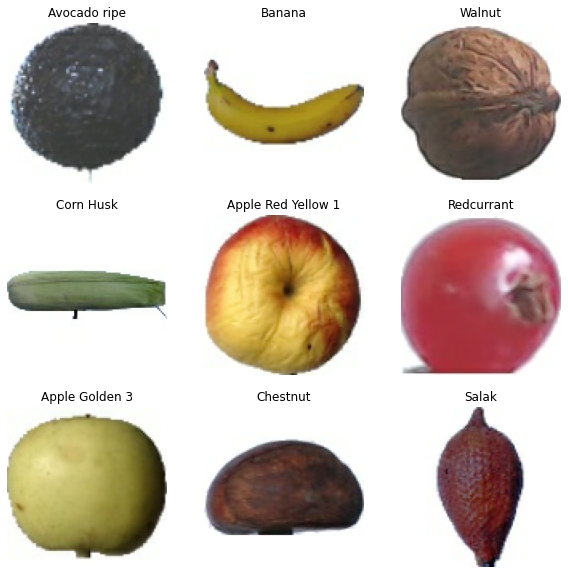

In [17]:
for images , labels in train_ds.take(3):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
    plt.show()

In [23]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
preprocess_input=tf.keras.applications.resnet.preprocess_input

In [25]:
pretrained_model=tf.keras.applications.resnet.ResNet50(
input_shape=(100,100,3),
include_top=False,
weights="imagenet")

94781440/94765736 [==============================] - 10s 0us/step


In [27]:
for layer in pretrained_model.layers:
    layer.trainable=False

In [28]:
input=tf.keras.Input(shape=(100,100,3))
x=data_augmentation(input)
x=preprocess_input(x)
x=pretrained_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dropout(0.3)(x)
output=tf.keras.layers.Dense(num_class)(x)

model=tf.keras.Model(inputs=input,outputs=output)

In [30]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [31]:
model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [ ]:
history=model.fit(train_ds,epochs=20,validation_data=val_ds)

Epoch 1/20
1693/1693 [==============================] - 394s 231ms/step - loss: 1.4881 - accuracy: 0.6565 - val_loss: 0.3139 - val_accuracy: 0.9595
Epoch 2/20
1693/1693 [==============================] - 392s 231ms/step - loss: 0.2784 - accuracy: 0.9387 - val_loss: 0.1248 - val_accuracy: 0.9848
Epoch 3/20
1693/1693 [==============================] - 392s 232ms/step - loss: 0.1350 - accuracy: 0.9734 - val_loss: 0.0698 - val_accuracy: 0.9938
Epoch 4/20
1693/1693 [==============================] - 394s 233ms/step - loss: 0.0822 - accuracy: 0.9852 - val_loss: 0.0455 - val_accuracy: 0.9955
Epoch 5/20
1693/1693 [==============================] - ETA: 0s - loss: 0.0566 - accuracy: 0.9896